## Feedforward Neural Network

![대체 텍스트](https://i.imgur.com/wJbR7EW.png)

모듈 불러오기

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#### Device configuration

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Hyper-parameters 

In [0]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### MNIST dataset 

In [0]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#### Fully connected neural network with one hidden layer

In [0]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#### Loss and optimizer


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

#### Train the model

In [7]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2760
Epoch [1/5], Step [200/600], Loss: 2.2536
Epoch [1/5], Step [300/600], Loss: 2.2451
Epoch [1/5], Step [400/600], Loss: 2.2155
Epoch [1/5], Step [500/600], Loss: 2.1847
Epoch [1/5], Step [600/600], Loss: 2.1615
Epoch [2/5], Step [100/600], Loss: 2.1457
Epoch [2/5], Step [200/600], Loss: 2.1078
Epoch [2/5], Step [300/600], Loss: 2.0852
Epoch [2/5], Step [400/600], Loss: 2.0820
Epoch [2/5], Step [500/600], Loss: 2.0486
Epoch [2/5], Step [600/600], Loss: 1.9922
Epoch [3/5], Step [100/600], Loss: 2.0182
Epoch [3/5], Step [200/600], Loss: 1.9804
Epoch [3/5], Step [300/600], Loss: 1.8846
Epoch [3/5], Step [400/600], Loss: 1.8872
Epoch [3/5], Step [500/600], Loss: 1.8658
Epoch [3/5], Step [600/600], Loss: 1.8106
Epoch [4/5], Step [100/600], Loss: 1.8102
Epoch [4/5], Step [200/600], Loss: 1.7771
Epoch [4/5], Step [300/600], Loss: 1.7125
Epoch [4/5], Step [400/600], Loss: 1.6787
Epoch [4/5], Step [500/600], Loss: 1.5672
Epoch [4/5], Step [600/600], Loss:

#### Test the model

In [13]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 77.16 %


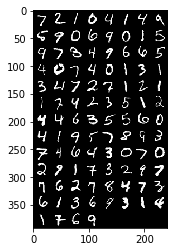

ground truth:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
predicted:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 7, 0, 0, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 3, 3, 2,
        4, 4, 6, 3, 5, 3, 2, 0, 4, 1, 9, 7, 7, 8, 9, 2, 7, 9, 2, 4, 3, 0, 7, 0,
        2, 8, 1, 7, 3, 7, 1, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 8, 3, 1, 4,
        1, 1, 6, 9])


In [12]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


with torch.no_grad():
    # get some random training images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    

    
    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

## 실습


http://yann.lecun.com/exdb/mnist/

hyper parameter를 조절하여 위사이트의 2-layer NN의 성능과 근접하게 만드세요

In [15]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/10], Step [100/600], Loss: 2.2668
Epoch [1/10], Step [200/600], Loss: 2.2560
Epoch [1/10], Step [300/600], Loss: 2.2178
Epoch [1/10], Step [400/600], Loss: 2.2165
Epoch [1/10], Step [500/600], Loss: 2.1732
Epoch [1/10], Step [600/600], Loss: 2.1693
Epoch [2/10], Step [100/600], Loss: 2.1355
Epoch [2/10], Step [200/600], Loss: 2.0940
Epoch [2/10], Step [300/600], Loss: 2.0762
Epoch [2/10], Step [400/600], Loss: 2.0622
Epoch [2/10], Step [500/600], Loss: 2.0269
Epoch [2/10], Step [600/600], Loss: 2.0072
Epoch [3/10], Step [100/600], Loss: 1.9914
Epoch [3/10], Step [200/600], Loss: 1.9441
Epoch [3/10], Step [300/600], Loss: 1.9383
Epoch [3/10], Step [400/600], Loss: 1.8597
Epoch [3/10], Step [500/600], Loss: 1.8567
Epoch [3/10], Step [600/600], Loss: 1.8311
Epoch [4/10], Step [100/600], Loss: 1.7670
Epoch [4/10], Step [200/600], Loss: 1.7502
Epoch [4/10], Step [300/600], Loss: 1.6923
Epoch [4/10], Step [400/600], Loss: 1.6471
Epoch [4/10], Step [500/600], Loss: 1.6601
Epoch [4/10